In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [10]:
path = './Dataset/'
address_csv = 'passingevents.csv'
df = pd.read_csv(path + address_csv)
print(df.head(5))
player_des_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 3]  # des为HusKies接球队员
player_ori_huskies = df[df["TeamID"] == 'Huskies'].iloc[:, 2]  # ori为Huskies出球队员
player_ori_huskies = list(player_ori_huskies.unique())
player_des_huskies = list(player_des_huskies.unique())
weight = [0.780373832, 0.81795196, 0.812659847, 0.832448093, 0.842606707, 0.841178878, 0.83362069,
          0.849388753, 0.835820896, 0.836218375, 0.842622951, 0.84305835, 0.812176166, 0.829679595,
          0.806215722, 0.705202312, 0.773413897, 0.746212121, 0.79342723, 0.720430108, 0.645833333,
          0.714285714, 0.721518987, 0.639344262, 0.818181818, 0.846153846, 0.9375, 0.875, 0.8, 0.8, 0.8,
          0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
dis_ori_x = list(df["EventOrigin_x"])
dis_ori_y = list(df["EventOrigin_y"])
dis_des_x = list(df["EventDestination_x"])
dis_des_y = list(df["EventDestination_y"])
distance = []
for i in range(len(dis_des_y)):
    distance.append(((dis_ori_x[i] - dis_des_x[i]) ** 2 + (dis_des_y[i] - dis_ori_y[i]) ** 2) ** 0.5)
    distance[i] = int(distance[i] / 3)

   MatchID     TeamID OriginPlayerID DestinationPlayerID MatchPeriod  \
0        1    Huskies     Huskies_D1          Huskies_F1          1H   
1        1    Huskies     Huskies_M1          Huskies_F2          1H   
2        1  Opponent1   Opponent1_D2        Opponent1_G1          1H   
3        1  Opponent1   Opponent1_G1        Opponent1_F1          1H   
4        1    Huskies     Huskies_M2          Huskies_M3          1H   

   EventTime EventSubType  EventOrigin_x  EventOrigin_y  EventDestination_x  \
0  46.323501    Head pass             34             97                59.0   
1  51.022546  Simple pass             53             89                69.0   
2  89.008721  Simple pass             19             16                 5.0   
3  92.216160       Launch              5             50                67.0   
4  98.265191  Simple pass             42             55                36.0   

   EventDestination_y  
0                95.0  
1                91.0  
2                50.

In [11]:
Hus_data = df.loc[df['TeamID'] == 'Huskies']
groupOri = Hus_data.groupby(['MatchID', 'OriginPlayerID']).count()
groupDes = Hus_data.groupby(['MatchID', 'DestinationPlayerID']).count()
groupOri = pd.DataFrame(groupOri, columns=['TeamID'])
groupDes = pd.DataFrame(groupDes, columns=['TeamID'])
groupOri.rename(columns={'TeamID': 'count1'}, inplace=True)
groupDes.rename(columns={'TeamID': 'count2'}, inplace=True)
sumCount = pd.concat([groupOri, groupDes], axis=1)
sumCount.fillna(0, inplace=True)
sumCount['count'] = sumCount['count1'] + sumCount['count2']
index = sumCount.index.to_frame()
sumCount = pd.concat([sumCount['count'], index['MatchID']], axis=1)  #每场比赛每名球员传球数（传出+接受）
sumbyPlayer = pd.concat([sumCount['count'], index[1]], axis=1)
PointSize = sumbyPlayer.groupby(1).sum()  #每名球员所有场次传球数和

<Figure size 2400x1600 with 0 Axes>

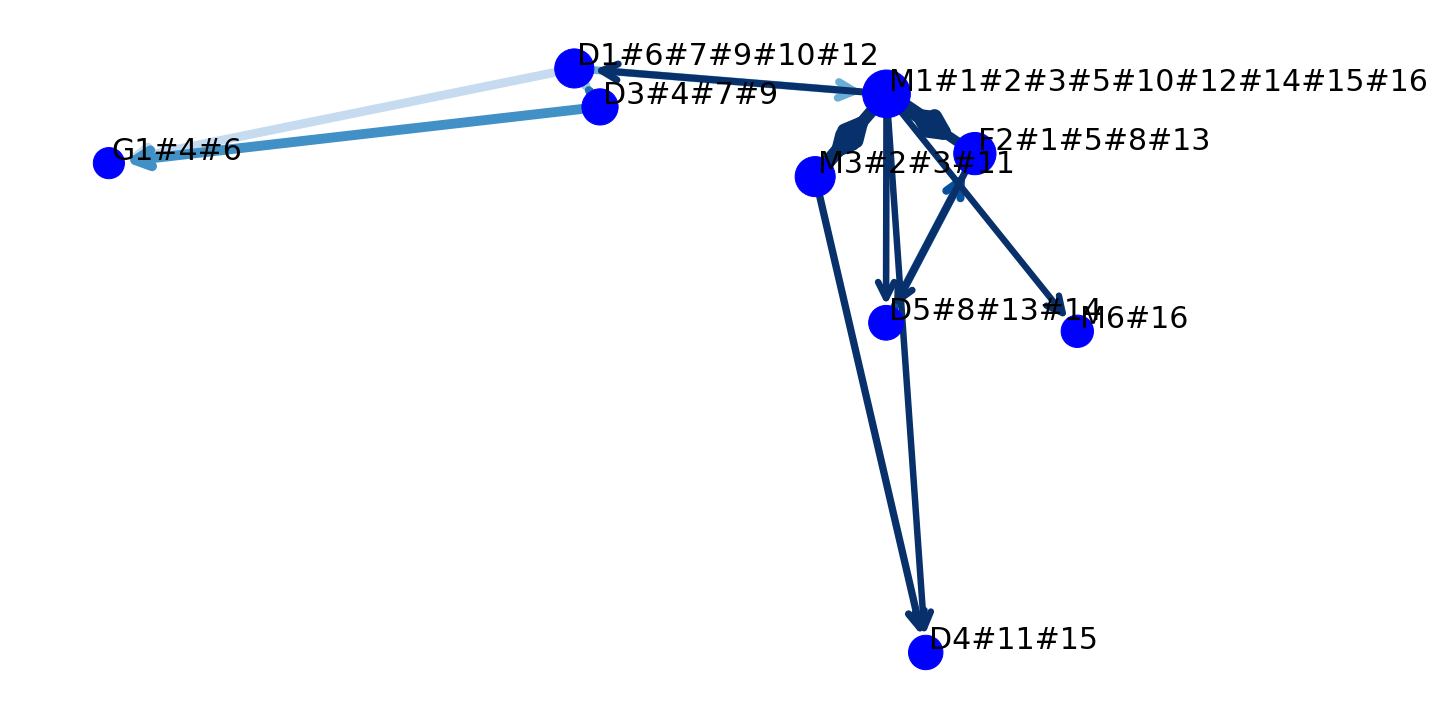

In [12]:
pairs_distinct_di=[]
for i in range(len(player_ori_huskies)):
    for j in range(len(player_ori_huskies)):
        if(i!=j):
            pairs_distinct_di.append([player_ori_huskies[i],player_ori_huskies[j]])
ori_player=df.iloc[:,2].tolist()
des_player=df.iloc[:,3].tolist()

pairs=[]
for i in range(len(ori_player)):
    pairs.append([ori_player[i],des_player[i]])

# print(pairs_distinct[1])
count_link_di=[]
pairs_each=[]
k=0
for i in range(len(pairs_distinct_di)):
    count_link_di.append(0)
for i in range(len(pairs)):
    pairs_each.append(pairs[i])
for i in pairs_distinct_di:
    for j in range(len(pairs_each)):
        if pairs_each[j]==i:
            count_link_di[k]=count_link_di[k]+weight[distance[j]]
    k=k+1
#     count_link.append(pairs_each.count(i))
# 按pairs里面的顺序每组关系计数
pairs_distinct_di_1=[]
for i in range(len(player_ori_huskies)):
    for j in range(len(player_ori_huskies)):
        if(i!=j):
            pairs_distinct_di_1.append([player_ori_huskies[i],player_ori_huskies[j]])
for k in range(len(pairs_distinct_di_1)):
    pairs_distinct_di_1[k].append(count_link_di[k])

adjacency=pairs_distinct_di_1

test=pd.DataFrame(data=adjacency)
top_node=16
arr_double_edge=np.array(test)
# print(arr_double_edge)
data=arr_double_edge
idex=np.lexsort([-1*data[:,2]])
sorted_data = data[idex, :]
arr_double_edge=sorted_data.tolist()
arr_double=arr_double_edge
arr_double_edge=arr_double[0:top_node]
inlist_double_weight=[]
for i in arr_double_edge:
    inlist_double_weight.append([i[0],i[1],i[2]])
for i in range(top_node):
    arr_double_edge[i].append('#'+str(i+1))
# print(arr_double_edge)
inlist_double_name=[]
for i in arr_double_edge:
    for j in range(2):
        inlist_double_name.append(i[j])
# print(inlist_double_weight)
inlist_double_name=list(set(inlist_double_name))
inlist_double_name.sort()
inlist_double_link=[]
for i in range(len(inlist_double_name)):
    inlist_double_link.append('')
    for j in range(len(arr_double_edge)):
        if(inlist_double_name[i] in arr_double_edge[j]):
            inlist_double_link[i]=inlist_double_link[i]+arr_double_edge[j][3]
# print(inlist_double_link)
player_ori_arr = []
player_des_arr = []
player_x = []
player_y = []
pos_player_mean = {}

for i in inlist_double_name:
    _df1 = df[df['OriginPlayerID']==i]
    _df2 = df[df['DestinationPlayerID']==i]
    player_ori_arr.append(_df1)
    player_des_arr.append(_df2)

    _x1 = list(_df1['EventOrigin_x'])
    _x2 = list(_df2['EventDestination_x'])
    _x = _x1+_x2
    _mean_x = np.sum(_x)/np.size(_x)

    _y1 = list(_df1['EventOrigin_y'])
    _y2 = list(_df2['EventDestination_y'])
    _y = _y1+_y2
    _mean_y = np.sum(_y)/np.size(_y)/105*65

    player_x.append(_mean_x)
    player_y.append(_mean_y)

    _l = [_mean_x, _mean_y]
    pos_player_mean[i] = _l
plt.figure(dpi=400)
plt.figure(figsize=[21,13])
DG=nx.MultiDiGraph()
DG.add_nodes_from(inlist_double_name)#添加点a
DG.add_weighted_edges_from(inlist_double_weight)
nodesizes=[]
for i in inlist_double_name:
    nodesizes.append(int(PointSize.loc[i]))
M = DG.number_of_edges() # 边的数量
# pos = nx.random_layout(G)

edge_colors = range(2, M + 2)

nodes = nx.draw_networkx_nodes(DG, pos_player_mean, node_size=nodesizes, node_color='blue')
edges = nx.draw_networkx_edges(DG, pos_player_mean, node_size=nodesizes, arrowstyle='->',
                               arrowsize=40, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues,
                               edge_vmin=0,edge_vmax=8,width=[float(v['weight']/10) for (r,c,v) in DG.edges(data=True)])
# print(width_sort)
for i in range(len(inlist_double_name)):
    _player = inlist_double_name[i]
    _x, _y = pos_player_mean[_player]

    plt.text(_x+0.14, _y+0.15, _player[8:]+inlist_double_link[i], size = 30, alpha = 1)


ax = plt.gca()
ax.set_axis_off() # 取消图的边框
plt.show()